In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
trainDf = pd.read_csv('trainingDf.csv') 
testDf = pd.read_csv('testingDf.csv')

## Feature Engineering and Storytelling    

In [23]:
trainDf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,AgeNew_26-35,AgeNew_36-45,AgeNew_51+,OccupationNew_0-2,OccupationNew_3-5,OccupationNew_6-8,OccupationNew_9-11,OccupationNew_12-14,OccupationNew_15-17,OccupationNew_18-20
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Metrics by User

In [ ]:
word_counter = {}

for word in phrase:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1

In [5]:
# Calculating metrics by user id grouping
AveragePurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean()
TotalPurchaseAmountUsers = trainDf['Purchase_Amount'].sum()
AverageTotalPurchaseAmountUsers = trainDf.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
NumberOfPurchasesUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
AverageNumberPurchasesUsers = np.mean(NumberOfPurchasesUser)

MaxPurchaseAmountUsers = np.max(trainDf['Purchase_Amount'])
MinPurchaseAmountUsers = np.min(trainDf['Purchase_Amount'])
MaxNumberPurchasesUsers = np.max(NumberOfPurchasesUser)
MinNumberPurchasesUsers = np.min(NumberOfPurchasesUser)

NumberUniqueProductsUser = trainDf.groupby(by='User_ID')['Product_ID'].nunique().sort_values(ascending = False)
AverageNumberUnqiqueProductsUsers = np.mean(NumberUniqueProductsUser)

StatsUsers = [TotalPurchaseAmountUsers, AverageTotalPurchaseAmountUsers,AverageNumberPurchasesUsers, MaxPurchaseAmountUsers, MinPurchaseAmountUsers, MaxNumberPurchasesUsers, MinNumberPurchasesUsers, AverageNumberUnqiqueProductsUsers]
StatsUsersStr = ['TotalPurchaseAmountUsers', 'AverageTotalPurchaseAmountUsers', 'AverageNumberPurchasesUsers', 'MaxPurchaseAmountUsers', 'MinPurchaseAmountUsers', 'MaxNumberPurchasesUsers', 'MinNumberPurchasesUsers', 'AverageNumberUnqiqueProductsUsers']
StatsUserStr = ['AveragePurchaseAmountUser', 'NumberOfPurchasesUser', 'NumberUniqueProductsUser']
StatsUser = [AveragePurchaseAmountUser, NumberOfPurchasesUser, NumberUniqueProductsUser]

In [6]:
for a, b in zip(StatsUserStr, StatsUser):
    print(a, ": ", b)

AveragePurchaseAmountUser :  User_ID
1000001     7778.200000
1000002     7483.400000
1000003    12486.750000
1000004    16651.750000
1000005     6335.500000
1000006     7808.666667
1000007    11538.666667
1000008    11197.000000
1000009     9121.166667
1000010    10809.594595
1000011     9711.000000
1000012    11055.500000
1000013    10268.500000
1000014     5570.500000
1000015    10185.368421
1000016     8569.666667
1000017    13438.600000
1000018    11749.583333
1000019     9800.461538
1000020    13606.500000
1000021     3055.000000
1000022     7697.950000
1000023    10498.629630
1000024     7529.714286
1000025    15015.600000
1000026     7796.000000
1000027    11733.000000
1000028     8811.333333
1000029    14742.600000
1000030     6942.666667
               ...     
1006008    15553.000000
1006009    10047.500000
1006010    11074.733333
1006011     5400.750000
1006012     7534.750000
1006013     8744.500000
1006014     5190.000000
1006015     6787.500000
1006016     8123.617647
100

In [7]:
for a, b in zip(StatsUsersStr, StatsUsers):
    print(a, ": ", b)

TotalPurchaseAmountUsers :  456173824
AverageTotalPurchaseAmountUsers :  84304.9018665681
AverageNumberPurchasesUsers :  9.078543707262982
MaxPurchaseAmountUsers :  23958
MinPurchaseAmountUsers :  185
MaxNumberPurchasesUsers :  137
MinNumberPurchasesUsers :  1
AverageNumberUnqiqueProductsUsers :  9.078543707262982


In [8]:
print(trainDf.Purchase_Amount.describe())

count    49124.000000
mean      9286.170182
std       4954.879590
min        185.000000
25%       5860.000000
50%       8048.000000
75%      12035.000000
max      23958.000000
Name: Purchase_Amount, dtype: float64


In [9]:
# Testing if there are any repeat purchases by concatenating user_id to product_id
# Then taking a set of this list which should remove all duplicate values which would 
# Represent reoccuring purchases. Then compared the length of the dataframes before and
# After calling Set. They are the same which suggests no repurchases occurred. 

trainDf['Id'] = trainDf['User_ID'].astype(str)+'_'+ trainDf['Product_ID'].astype(str) 
print(trainDf['Id'].count()) #prints count of all purchases

new = list(set(trainDf['Id'])) #creates a list containing a set of all purchases
print(len(new))

new.append('1001666_P00002042') #adding a duplicate value and printing length
print(len(new))

new2 = set(new) #taking a set of the list with duplicate value to confirm set removes dupes
print(len(new2))

49124
49124
49125
49124


In [10]:
StatsUser = [AveragePurchaseAmountUser, NumberOfPurchasesUser, NumberUniqueProductsUser]

avg_df = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean().reset_index().rename(columns={'Purchase_Amount': 'AvgPurchaseAmount'})
#avg_df = trainDf.merge(avg_df, on='User_ID')


numppu_df = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().reset_index().rename(columns={'Purchase_Amount': 'NumberPurchasesUser'})
#numppu_df = trainDf.merge(numppu_df, on='User_ID')

trainDf = trainDf.merge(avg_df,on='User_ID').merge(numppu_df,on='User_ID')

print(trainDf)

       User_ID Product_ID Gender    Age  Occupation City_Category  \
0      1000001  P00069042      F   0-17          10             A   
1      1000001  P00248942      F   0-17          10             A   
2      1000001  P00087842      F   0-17          10             A   
3      1000001  P00085442      F   0-17          10             A   
4      1000001  P00085942      F   0-17          10             A   
5      1000002  P00285442      M    55+          16             C   
6      1000002  P00112842      M    55+          16             C   
7      1000002  P00293242      M    55+          16             C   
8      1000002  P00289342      M    55+          16             C   
9      1000002  P00303342      M    55+          16             C   
10     1000003  P00193542      M  26-35          15             A   
11     1000003  P00132842      M  26-35          15             A   
12     1000003   P0098342      M  26-35          15             A   
13     1000003  P00010242      M  

In [11]:
#trainDf.groupby(by="Product_ID").count().sort_values(by="User_ID", ascending=False)

### Visualizations by user

In [12]:
plt.gcf().clear()

# Histogram of average purchase amount by user
plt.subplot(2,2,1)
plt.hist(AverageUserPurchaseAmount, bins = 50)
plt.xlabel('Average Purchase Amount per User')
plt.ylabel('Count')
plt.title('Average Purchase Amount per User')
plt.margins(.02)

# Histogram of number of unique products by user
plt.subplot(2,2,2)
plt.hist(UniqueProductsPerUser, bins = 50)
plt.xlabel('Number of Unique Products Purchased')
plt.ylabel('Count')
plt.title('Number of Unique Products By User')
plt.margins(.02)

# Total number of purchases by user
plt.subplot(2,2,3)
plt.hist(NumberOfPurchasesPerUser, bins = 50)
plt.xlabel('Number of Proudcts Purchased By User')
plt.ylabel('Count')
plt.title('Number of Products Purchased By User')
plt.margins(.02)


# 
plt.subplot(2,2,4)

plt.title('Number of repurchases by user')
plt.margins(.02)

plt.tight_layout()


plt.show()

NameError: name 'AverageUserPurchaseAmount' is not defined

### Metrics by Gender

In [13]:
gender = trainDf.columns[12:14]

genderDfs = {}
genderLst = []

for item in gender:
    genderDfs[item] = trainDf[trainDf[item]==1]
    genderLst.append(trainDf[trainDf[item]==1])
    
genderStats = {}

for key, value in genderDfs.items():
    #loop through each occupation data frame
    #print(key, "\n \n", value.head())
    
    temps = {}

    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    
    genderStats[key] = temps
       
i = 0

for key, value in genderStats.items():
    print(key, "\n")
    
    print(genderLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')
    

Female 

count    12017.000000
mean      8735.983274
std       4683.572331
min        347.000000
25%       5435.000000
50%       7913.000000
75%      11300.000000
max      23941.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  8735.983273695598
TotalPurchaseAmount :  104980311
NumberPurchases :  12017
AverageNumberPurchases :  7.974120769741208
AverageTotalPurchaseAmount :  69661.78566688785
MaxPurchaseAmountUsers :  23941
MinPurchaseAmountUsers :  347
MaxNumberPurchasesUsers :  107
MinNumberPurchasesUsers :  1


Male 

count    37107.000000
mean      9464.346700
std       5026.780252
min        185.000000
25%       5906.000000
50%       8099.000000
75%      12352.000000
max      23958.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9464.346700083543
TotalPurchaseAmount :  351193513
NumberPurchases :  37107
AverageNumberPurchases :  9.504866803278688
AverageTotalPurchaseAmount :  89957.35476434426
MaxPurchaseAmountUsers :  23958
MinPurchas

### Visualizations by Gender

In [14]:
plt.gcf().clear()
import seaborn as sns
#Histogram of purchase amount by gender

plt.hist(female['Purchase_Amount'], bins = 50, alpha=.5, label='female', color='pink')

plt.subplot(2,2,1)
plt.hist(female['Purchase_Amount'], bins = 50, alpha=.75, label='female', color='red')
plt.hist(male['Purchase_Amount'], bins = 50, alpha=.25, label='male', color='blue')
plt.title('Purchae Amount By Gender')
plt.legend(loc = 'upper right')
plt.margins(.02)

#Box and whiskers of purchase amount by gender
plt.subplot(2,2,2)
sns.boxplot(x = 'Purchase_Amount', y = 'Gender', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender')
plt.title('Purchase Amount By Gender')
plt.margins(.02)

#Violin plot of purchase amount by gender
plt.subplot(2,2,3)
sns.violinplot(x='Gender', y='Purchase_Amount', data=trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

# Strip plot of purchase amount by gender
plt.subplot(2,2,4)
sns.stripplot(x= 'Gender', y= 'Purchase_Amount', data = trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

plt.tight_layout()

plt.show()

NameError: name 'female' is not defined

In [ ]:
# Unable to run swarmplot
# Try both numerial..
import seaborn as sns
sns.swarmplot(x= 'Purchase_Amount', y= 'Gender_0_1', data = trainDf)
plt.show()

In [15]:
def f(row):
    if row['Gender'] == 'M':
        val = 1
    else:
        val = 0
    return val

trainDf['Gender_0_1'] = trainDf.apply(f, axis=1)

plt.subplot(2,1,1)
sns.swarmplot(x= 'Gender_0_1', y= 'Purchase_Amount', data = trainDf)

KeyboardInterrupt: 

### Metrics by Age Range

In [49]:
trainDf.columns[14:21]

Index(['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+'],
      dtype='object')

In [15]:
ages = trainDf.columns[14:21]

ageDfs = {}
agelst = []

for item in ages:
    ageDfs[item] = trainDf[trainDf[item]==1]
    agelst.append(trainDf[trainDf[item]==1])

ageStats = {}    
    
for key, value in ageDfs.items():
    
    temps = {}

    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
   
    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())

    ageStats[key] = temps

i = 0

for key, value in ageStats.items():
    
    print(key, "\n")
    print(agelst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')   
        

Age_0-17 

count     1401.000000
mean      9094.816560
std       5091.135583
min        575.000000
25%       5353.000000
50%       8070.000000
75%      12074.000000
max      23847.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9094.816559600285
TotalPurchaseAmount :  12741838
NumberPurchases :  1401
AverageNumberPurchases :  6.935643564356436
AverageTotalPurchaseAmount :  63078.40594059406
MaxPurchaseAmountUsers :  23847
MinPurchaseAmountUsers :  575
MaxNumberPurchasesUsers :  98
MinNumberPurchasesUsers :  1


Age_18-25 

count     9390.000000
mean      9183.259957
std       4983.408975
min        347.000000
25%       5423.000000
50%       8015.500000
75%      12031.250000
max      23897.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9183.259957401491
TotalPurchaseAmount :  86230811
NumberPurchases :  9390
AverageNumberPurchases :  9.542682926829269
AverageTotalPurchaseAmount :  87632.93800813008
MaxPurchaseAmountUsers :  23897
MinPurch

### Visualization by Age Range

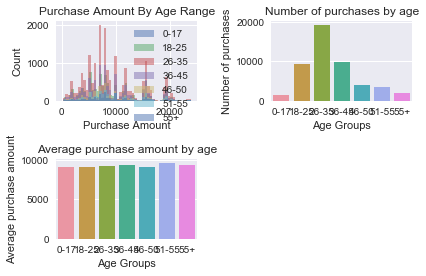

In [19]:
plt.gcf().clear()

plt.subplot(2,2,1)

ages = list(set(trainDf['Age']))
ages.sort()
holdAge = []
for ageRang in ages:
    temp = trainDf[trainDf['Age'] == ageRang]
    holdAge.append(temp)
    plt.hist(temp['Purchase_Amount'], bins=50, alpha=.5, label= ageRang)
    
plt.title('Purchase Amount By Age Range')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)

NumPurchByAge = testDf.groupby(by='Age')['Purchase_Amount'].count()
NumPurchByAgeDf = pd.DataFrame(NumPurchByAge)
x= NumPurchByAgeDf.index
x = list(x)
y = list(NumPurchByAgeDf
         ['Purchase_Amount'][:])
ax = sns.barplot(x= x, y= y, data=NumPurchByAgeDf)
ax.set(xlabel='Age Groups', ylabel='Number of purchases', title='Number of purchases by age')

plt.subplot(2,2,3)
AvgPurchByAge = testDf.groupby(by='Age')['Purchase_Amount'].mean()
x1= AvgPurchByAge.index
AvgPurchByAgeDf = pd.DataFrame(AvgPurchByAge)
x1 = list(x1)
y1 = list(AvgPurchByAgeDf['Purchase_Amount'][:])

ax = sns.barplot(x= x1, y= y1, data=AvgPurchByAgeDf)
ax.set(xlabel='Age Groups', ylabel='Average purchase amount', title='Average purchase amount by age')

plt.tight_layout()

plt.show()

### Statistics By Occupation

In [19]:
print(trainDf.columns[21:42]) #selects only occupation columns

Index(['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation',
       '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation',
       '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation',
       '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation',
       '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation',
       '20_Occupation'],
      dtype='object')


In [94]:
occupations = trainDf.columns[21:42]

OccupationDfs = {}
Occupationslst = []

for item in occupations:
    OccupationDfs[item] = trainDf[trainDf[item]==1]
    Occupationslst.append(trainDf[trainDf[item]==1])

OccupationStats = {}

for key, value in OccupationDfs.items():
    #loop through each occupation data frame
    #print(key, "\n \n", value.head())
    
    temps = {}

    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
    
    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    OccupationStats[key] = temps

i = 0

for key, value in OccupationStats.items():
    print(key, "\n")
    
    print(Occupationslst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

0_Occupation 

count     6249.000000
mean      9105.324852
std       4868.071300
min        371.000000
25%       5473.000000
50%       8004.000000
75%      11922.000000
max      23958.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9105.324851976316
TotalPurchaseAmount :  56899175
NumberPurchases :  6249
AverageNumberPurchases :  9.71850699844479
AverageTotalPurchaseAmount :  88490.1632970451
MaxPurchaseAmountUsers :  23958
MinPurchaseAmountUsers :  371
MaxNumberPurchasesUsers :  87
MinNumberPurchasesUsers :  1


1_Occupation 

count     4165.000000
mean      8905.612965
std       4684.829565
min        216.000000
25%       5845.000000
50%       7952.000000
75%      11603.000000
max      23899.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  8905.612965186074
TotalPurchaseAmount :  37091878
NumberPurchases :  4165
AverageNumberPurchases :  8.805496828752643
AverageTotalPurchaseAmount :  78418.3467230444
MaxPurchaseAmountUsers :  23899
MinP

### Visualization By Occupation

### Statistics By City Category

In [95]:
citycat = trainDf.columns[42:45]

citycatDfs = {}
citycatLst = []

for item in citycat:
    citycatDfs[item] = trainDf[trainDf[item]==1]
    citycatLst.append(trainDf[trainDf[item]==1])
    
citycatStats = {}
citycatStat = {}


for key, value in citycatDfs.items():
    #loop through each occupation data frame
    #print(key, "\n \n", value.head())
    
    tempS = {}
    temp = {}


    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temp['AveragePurchaseAmountUser'] = value.groupby(by='User_ID')['Purchase_Amount'].mean()
    
    temp['NumberOfPurchasesUser'] = value.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
    
    citycatStats[key] = temps
    citycatStat[key] = temp

    
i = 0

for key, value in citycatStats.items():
    print(key, "\n")
    
    print(citycatLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

City_Category_A 

count    13873.000000
mean      8842.529446
std       4837.328960
min        185.000000
25%       5396.000000
50%       7903.000000
75%      11699.000000
max      23949.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9792.575636412103
TotalPurchaseAmount :  146947390
NumberPurchases :  15006
AverageNumberPurchases :  5.3288352272727275
AverageTotalPurchaseAmount :  52183.022017045456
MaxPurchaseAmountUsers :  23958
MinPurchaseAmountUsers :  187
MaxNumberPurchasesUsers :  36
MinNumberPurchasesUsers :  1


City_Category_B 

count    20245.000000
mean      9214.819610
std       4927.921076
min        188.000000
25%       5471.000000
50%       8025.000000
75%      12015.000000
max      23948.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9792.575636412103
TotalPurchaseAmount :  146947390
NumberPurchases :  15006
AverageNumberPurchases :  5.3288352272727275
AverageTotalPurchaseAmount :  52183.022017045456
MaxPurchaseAmountUs

### Visualization By City Category